
#### Importeren van de dataset

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


# Uitwerking van de verschillende methoden

## Multiple Linear Regression

Ridge Regression is een variant van Multiple Linear Regression waarbij een regularisatieparameter wordt toegevoegd aan de verliesfunctie om overfitting tegen te gaan.

### Stap 1: Train-Test split

In deze stap wordt de dataset verdeeld in een trainingsset en een testset. De features (onafhankelijke variabelen) worden gebruikt om het model te trainen, terwijl de target (afhankelijke variabele) wordt gebruikt om het model te evalueren.

- **Features**: Alle kolommen behalve `medv` worden als features gebruikt.
  - De `medv`-kolom wordt niet gebruikt als feature, omdat deze de target variabele is.
- **Target**: De `medv`-kolom wordt als de target variabele gebruikt.
- **Verdeling**: 80% van de data wordt gebruikt voor training en 20% voor testen.

### Stap 2: Hyperparameter Tuning

We passen `GridSearchCV` toe om de beste hyperparameters voor het Ridge Regression model te vinden. Dit helpt bij het verbeteren van de modelprestaties door de optimale waarde voor de regularisatieparameter (`alpha`) te bepalen.

- **Model**: Ridge Regression
- **Parameter Grid**: `{'alpha': [0.1, 1, 10, 100, 1000]}`
- **Cross-Validation**: 5-voudige cross-validatie wordt gebruikt om de beste hyperparameters te selecteren.

### Stap 3: Model Training

Het model wordt getraind met de beste hyperparameters die zijn gevonden tijdens de hyperparameter tuning. Hiervoor wordt de `Ridge` klasse van scikit-learn gebruikt.

- **Model**: Ridge Regression met de beste `alpha` waarde.
- **Trainingsset**: De getrainde features (`X_train`) en de target (`y_train`) worden gebruikt om het model te fitten.

### Stap 4: Voorspelling en Evaluatie

Het getrainde model wordt gebruikt om voorspellingen te doen op de testset. De prestaties van het model worden geëvalueerd met behulp van Mean Squared Error (MSE) en de R^2 score. Daarnaast wordt een voorbeeld predictie getoond om de werking van het model te illustreren.

- **Voorspellingen**: Het model maakt voorspellingen (`y_pred`) op basis van de testset (`X_test`).
- **Evaluatie**:
  - **Mean Squared Error (MSE)**: Gemiddelde kwadraat van de fouten tussen de voorspelde waarden en de werkelijke waarden. Een lagere MSE betekent een beter model.
  - **R^2 Score**: Verhouding van verklaarde variantie. Een waarde dichter bij 1 betekent een beter model.
- **Cross-Validation Scores**: 5-voudige cross-validatie wordt toegepast om robuuste prestatiemetingen te verkrijgen.
  - **R^2 scores** van cross-validatie
  - **Gemiddelde R^2 score** van cross-validatie

### Voorbeeld Predictie

Een willekeurige index uit de testset wordt geselecteerd. De feature-waarden voor deze index worden opgehaald en gebruikt om een voorspelling te maken. De werkelijke `medv` waarde en de voorspelde `medv` waarde worden vergeleken om de nauwkeurigheid van de voorspelling te illustreren.

- **Feature waarden**: De waarden van de features voor een willekeurige observatie uit de testset.
- **Werkelijke waarde**: De werkelijke `medv` waarde voor deze observatie.
- **Voorspelde waarde**: De voorspelde `medv` waarde voor deze observatie.



Beste hyperparameters: {'alpha': 1}
Mean Squared Error: 0.02081486731506015
R^2 Score: 0.4823825595242677
Cross-validation R^2 scores: [0.39633978 0.38382517 0.45763436 0.45463067 0.55256533]
Gemiddelde Cross-validation R^2 score: 0.4489990631084721

Voorbeeld predictie:
Feature waarden: INHOUDOPZET_THEMA             0.843750
AANSLUITING_THEMA             0.875000
DOCENTEN_THEMA                0.781250
BEGELEIDING_THEMA             0.750000
TOETSINGBEOORDELING_THEMA     0.916667
BETROKKENHEIDCONTACT_THEMA    0.861111
STUDIEDRUK_01                 0.500000
VAARDIGHEDEN_THEMA            0.958333
STUDIELAST_THEMA              0.800000
STUDIEFACILITEITEN_THEMA      0.760395
Name: 4393, dtype: float64
Werkelijke tevredenheids waarde: 0.75
Voorspelde tevredenheids waarde: 0.8733862500844933


C:\Users\sdann\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


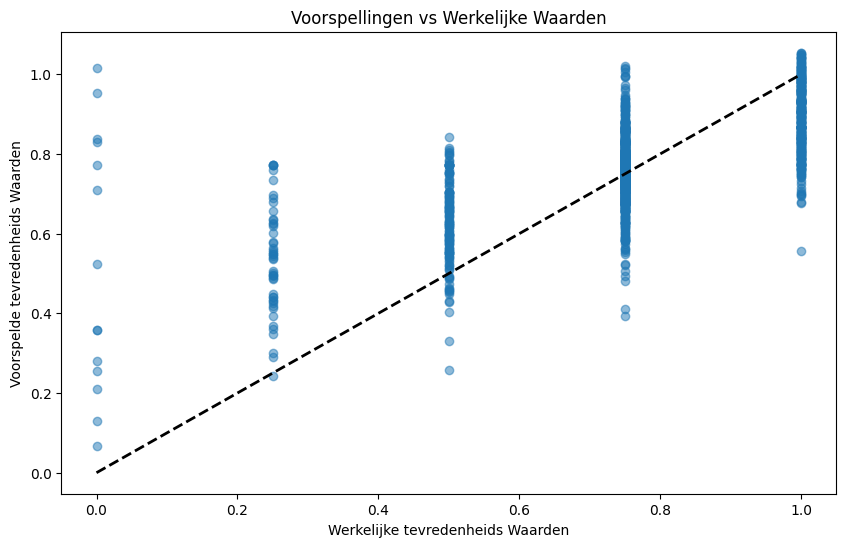

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# dataset laden
url = "NSE_Instellingsbestand_scaled.csv"
df = pd.read_csv(url)

# feature en target variabelen definiëren 
features = ['INHOUDOPZET_THEMA', 'AANSLUITING_THEMA', 'DOCENTEN_THEMA', 
            'BEGELEIDING_THEMA', 'TOETSINGBEOORDELING_THEMA', 
            'BETROKKENHEIDCONTACT_THEMA', 'STUDIEDRUK_01', 
            'VAARDIGHEDEN_THEMA', 'STUDIELAST_THEMA', 
            'STUDIEFACILITEITEN_THEMA']

X = df[features]
y = df['TEVREDENHEIDALGEMEEN_01']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definieer het model en de parameter grid
ridge = Ridge()
param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}

# Gebruik GridSearchCV om de beste hyperparameters te vinden
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Beste hyperparameters
print("Beste hyperparameters:", grid_search.best_params_)

# Train het model opnieuw met de beste hyperparameters
best_ridge = grid_search.best_estimator_
best_ridge.fit(X_train, y_train)

# Voorspellingen maken
y_pred = best_ridge.predict(X_test)

# Evaluatie
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Cross-validation toepassen
cv_scores = cross_val_score(best_ridge, X, y, cv=5, scoring='r2')
print("Cross-validation R^2 scores:", cv_scores)
print("Gemiddelde Cross-validation R^2 score:", cv_scores.mean())

# Voorbeeld predictie tonen
random_index = np.random.randint(0, len(X_test))
example_features = X_test.iloc[random_index]
example_actual_medv = y_test.iloc[random_index]
example_predicted_medv = best_ridge.predict([example_features])[0]

print("\nVoorbeeld predictie:")
print(f"Feature waarden: {example_features}")
print(f"Werkelijke tevredenheids waarde: {example_actual_medv}")
print(f"Voorspelde tevredenheids waarde: {example_predicted_medv}")

# Scatter plot van voorspellingen vs werkelijke waarden
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Werkelijke tevredenheids Waarden')
plt.ylabel('Voorspelde tevredenheids Waarden')
plt.title('Voorspellingen vs Werkelijke Waarden')
plt.show()

